# 2. Derivatives in Python

Derivatives tell us how fast a function is changing at any point.
Think of it as the "slope" or "steepness" of a curve at a specific point.


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Simple numerical derivative function
def numerical_derivative(f, x, h=0.00001):
    """Calculate derivative numerically using central difference: (f(x+h) - f(x-h)) / (2h)  this is Central Difference (two-sided). thisis more accurate than forward difference, because the error is reduced by half.
    usual derivative is (f(x + h) - f(x)) / ( h)"""
    return (f(x + h) - f(x - h)) / (2 * h)


## 1. What is a Derivative?

A derivative measures how much y changes when x changes by a tiny amount.
If the function is y = 2x, then the derivative is always 2 (steepness is constant).


For y = 2x, at x = 3, the derivative (slope) = 2
Numerical derivative at x = [ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.5757575

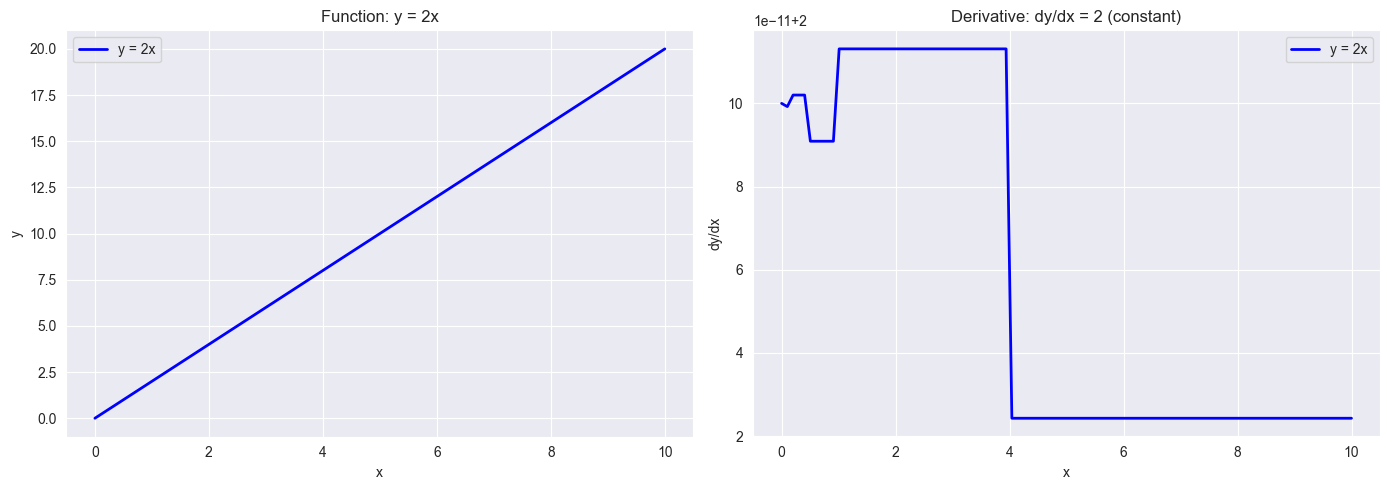

In [18]:
# Example: y = 2x
# The derivative of y = 2x is always 2
# This means: for every step in x, y increases by 2

def f(x):
    return 2 * x

# The derivative at any point is 2
x_point = 3
derivative_value = 2  # derivative of 2x is 2
print(f"For y = 2x, at x = {x_point}, the derivative (slope) = {derivative_value}")

# Visualize function and its derivative
x = np.linspace(0, 10, 100)
y = f(x)
yderiv = numerical_derivative(f, x)
print(f"Numerical derivative at x = {x}: {yderiv}")
dy_dx = np.full_like(x, 2)  # derivative is constant at 2

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot function
ax1.plot(x, y, 'b-', linewidth=2, label='y = 2x')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Function: y = 2x')
ax1.grid(True)
ax1.legend()

# Plot derivative
#ax2.plot(x, dy_dx, 'r-', linewidth=2, label="dy/dx = 2")
ax2.plot(x, yderiv, 'b-', linewidth=2, label='y = 2x')

ax2.set_xlabel('x')
ax2.set_ylabel('dy/dx')
ax2.set_title('Derivative: dy/dx = 2 (constant)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()


## 2. Derivative of y = x²

The derivative of y = x² is y' = 2x.
This means the slope changes as x changes!


Point | Function value | Derivative (slope)
---------------------------------------------
x= -2 | y =   4        | dy/dx =  -4
x= -1 | y =   1        | dy/dx =  -2
x=  0 | y =   0        | dy/dx =   0
x=  1 | y =   1        | dy/dx =   2
x=  2 | y =   4        | dy/dx =   4
x=  3 | y =   9        | dy/dx =   6


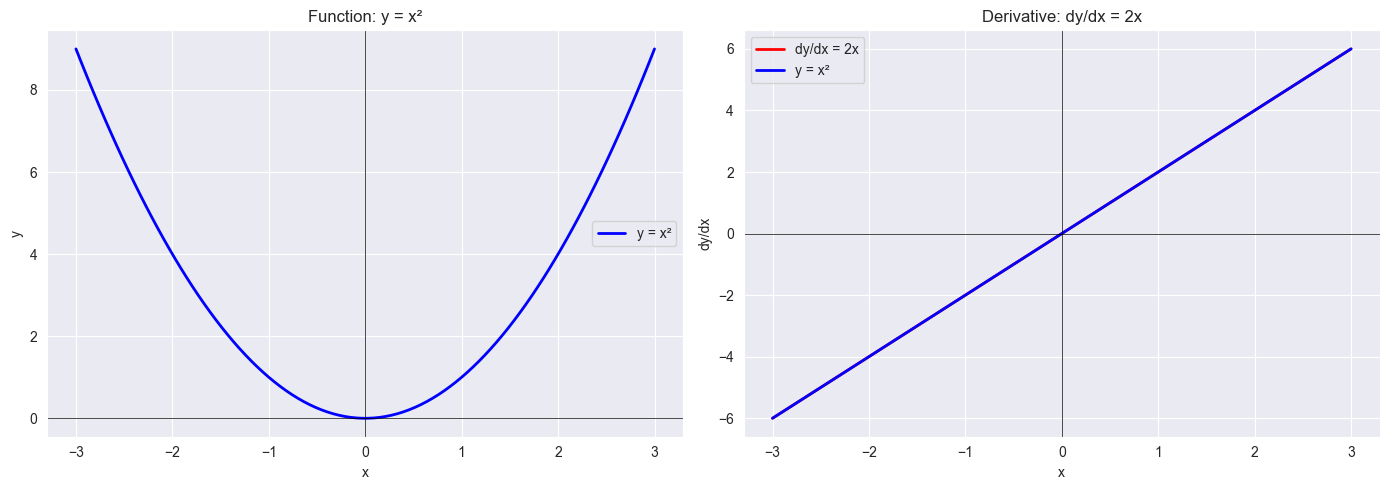

In [17]:



# Example: y = x², derivative = 2x
def f(x):
    return x ** 2

def df_dx(x):
    return 2 * x  # derivative of x² is 2x

# Check derivatives at different points
points = [-2, -1, 0, 1, 2, 3]
print("Point | Function value | Derivative (slope)")
print("-" * 45)
for x in points:
    y = f(x)
    slope = df_dx(x)
    print(f"x={x:3d} | y = {y:3d}        | dy/dx = {slope:3d}")

# Visualize
x = np.linspace(-3, 3, 100)
y = f(x)
dy_dx = df_dx(x)
yderiv = numerical_derivative(f, x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot function
ax1.plot(x, y, 'b-', linewidth=2, label='y = x²')

ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Function: y = x²')
ax1.grid(True)
ax1.legend()
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# Plot derivative
ax2.plot(x, dy_dx, 'r-', linewidth=2, label="dy/dx = 2x")
ax2.plot(x, yderiv, 'b-', linewidth=2, label='y = x²')
ax2.set_xlabel('x')
ax2.set_ylabel('dy/dx')
ax2.set_title('Derivative: dy/dx = 2x')
ax2.grid(True)
ax2.legend()
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


## 3. Visualizing Tangent Lines

The derivative gives us the slope of the tangent line at any point.
Let's draw the tangent lines on the curve!


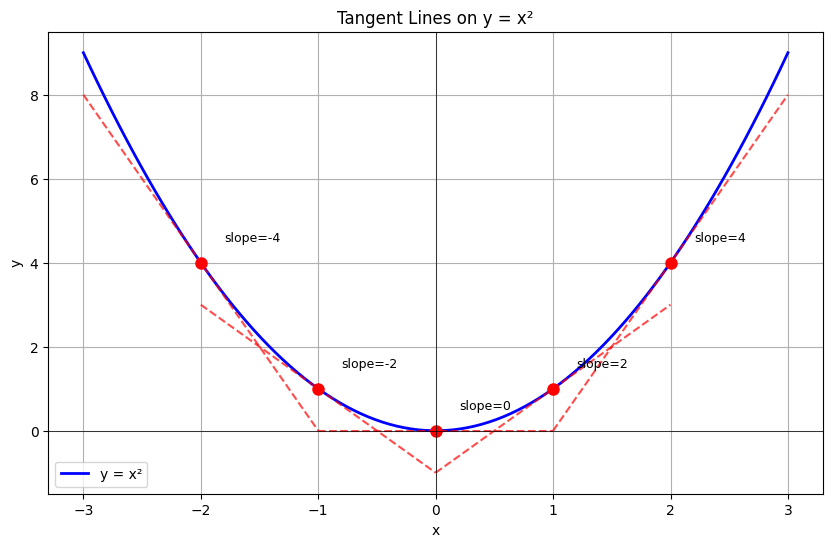

In [4]:
# Draw tangent lines at different points on y = x²
def f(x):
    return x ** 2

def df_dx(x):
    return 2 * x

def tangent_line(x, x0):
    """Equation of tangent line at x0: y = f(x0) + f'(x0)(x - x0)"""
    return f(x0) + df_dx(x0) * (x - x0)

x = np.linspace(-3, 3, 100)
y = f(x)

# Points where we'll draw tangent lines
tangent_points = [-2, -1, 0, 1, 2]

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='y = x²')

# Draw tangent lines
for x0 in tangent_points:
    x_tangent = np.linspace(x0 - 1, x0 + 1, 50)
    y_tangent = tangent_line(x_tangent, x0)
    slope = df_dx(x0)
    plt.plot(x_tangent, y_tangent, 'r--', linewidth=1.5, alpha=0.7)
    plt.plot(x0, f(x0), 'ro', markersize=8)
    plt.text(x0 + 0.2, f(x0) + 0.5, f'slope={slope}', fontsize=9)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Tangent Lines on y = x²')
plt.grid(True)
plt.legend()
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()


## 4. Common Derivative Rules

Here are some simple rules for finding derivatives:


In [5]:
# Rule 1: Derivative of constant is 0
# y = 5 → dy/dx = 0

# Rule 2: Derivative of x^n is n*x^(n-1)
# y = x³ → dy/dx = 3x²
# y = x⁴ → dy/dx = 4x³

# Rule 3: Derivative of constant * function
# y = 3x² → dy/dx = 6x

# Let's verify Rule 2 with examples
print("Function    | Derivative")
print("-" * 35)
print("y = x²      | dy/dx = 2x")
print("y = x³      | dy/dx = 3x²")
print("y = x⁴      | dy/dx = 4x³")
print("y = x⁵      | dy/dx = 5x⁴")
print()
print("Let's check y = x³:")

def f_cubic(x):
    return x ** 3

def df_cubic_dx(x):
    return 3 * x ** 2

test_points = [0, 1, 2, 3]
print("\nPoint | Function | Derivative")
print("-" * 35)
for x in test_points:
    y = f_cubic(x)
    slope = df_cubic_dx(x)
    print(f"x={x}   | y = {y:3d}  | dy/dx = {slope:3d}")


Function    | Derivative
-----------------------------------
y = x²      | dy/dx = 2x
y = x³      | dy/dx = 3x²
y = x⁴      | dy/dx = 4x³
y = x⁵      | dy/dx = 5x⁴

Let's check y = x³:

Point | Function | Derivative
-----------------------------------
x=0   | y =   0  | dy/dx =   0
x=1   | y =   1  | dy/dx =   3
x=2   | y =   8  | dy/dx =  12
x=3   | y =  27  | dy/dx =  27


## 5. Derivative of y = x³

Let's visualize the function and its derivative together.


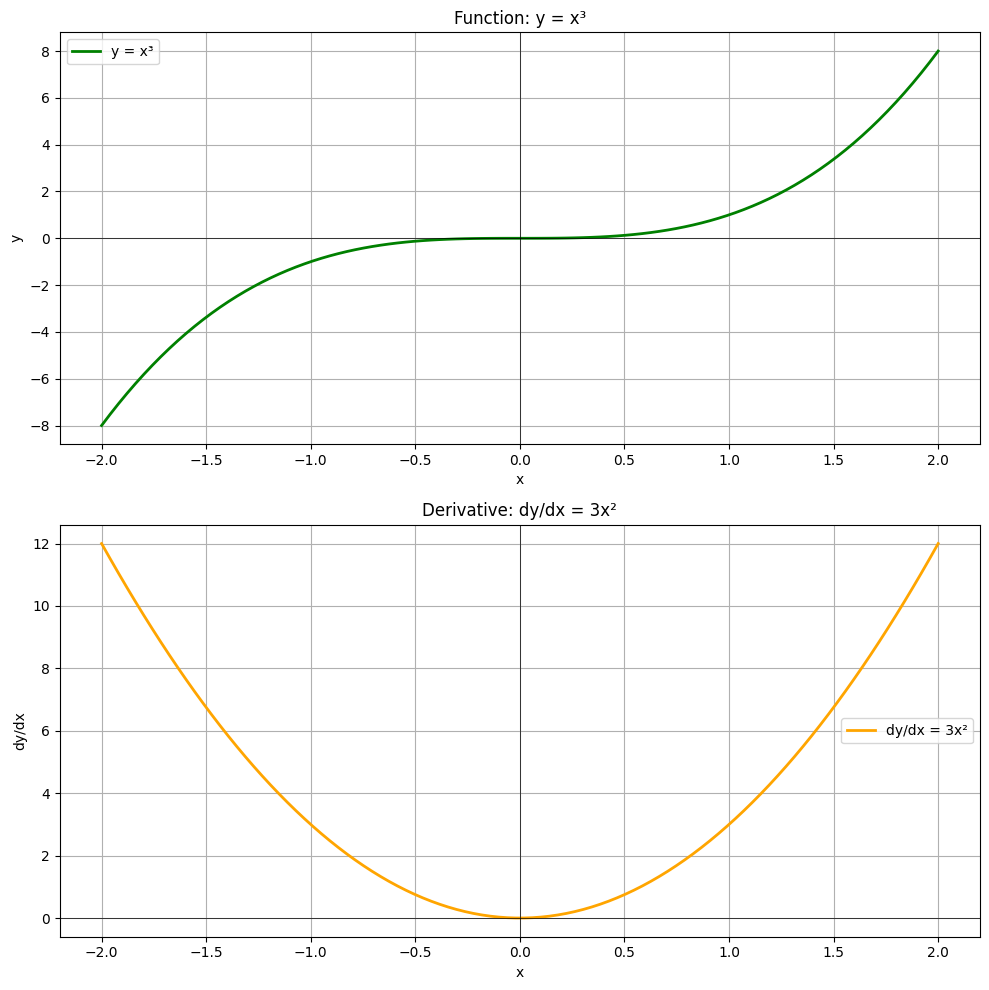

In [6]:
# y = x³, derivative = 3x²
def f(x):
    return x ** 3

def df_dx(x):
    return 3 * x ** 2

x = np.linspace(-2, 2, 100)
y = f(x)
dy_dx = df_dx(x)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot function
ax1.plot(x, y, 'g-', linewidth=2, label='y = x³')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Function: y = x³')
ax1.grid(True)
ax1.legend()
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# Plot derivative
ax2.plot(x, dy_dx, 'orange', linewidth=2, label="dy/dx = 3x²")
ax2.set_xlabel('x')
ax2.set_ylabel('dy/dx')
ax2.set_title('Derivative: dy/dx = 3x²')
ax2.grid(True)
ax2.legend()
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


## 6. Derivative of y = 2x + 3

The derivative of a sum is the sum of derivatives.
y = 2x + 3 → dy/dx = 2 (the constant 3 disappears!)


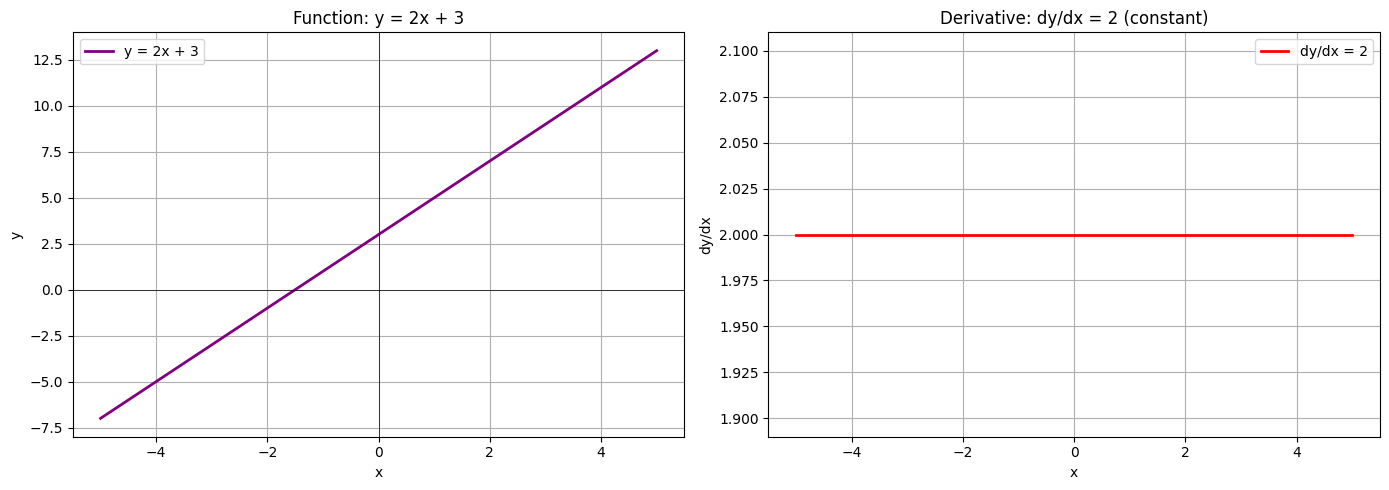

Note: The constant +3 doesn't affect the derivative!
The slope is always 2, regardless of where we are on the line.


In [7]:
# y = 2x + 3, derivative = 2
def f(x):
    return 2 * x + 3

def df_dx(x):
    return 2  # derivative of 2x is 2, derivative of 3 is 0

x = np.linspace(-5, 5, 100)
y = f(x)
dy_dx = np.full_like(x, 2)  # constant derivative

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot function
ax1.plot(x, y, 'purple', linewidth=2, label='y = 2x + 3')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Function: y = 2x + 3')
ax1.grid(True)
ax1.legend()
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)

# Plot derivative
ax2.plot(x, dy_dx, 'r-', linewidth=2, label="dy/dx = 2")
ax2.set_xlabel('x')
ax2.set_ylabel('dy/dx')
ax2.set_title('Derivative: dy/dx = 2 (constant)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

print("Note: The constant +3 doesn't affect the derivative!")
print("The slope is always 2, regardless of where we are on the line.")


## 7. Comparing Functions and Their Derivatives

Let's see multiple functions and their derivatives side by side.


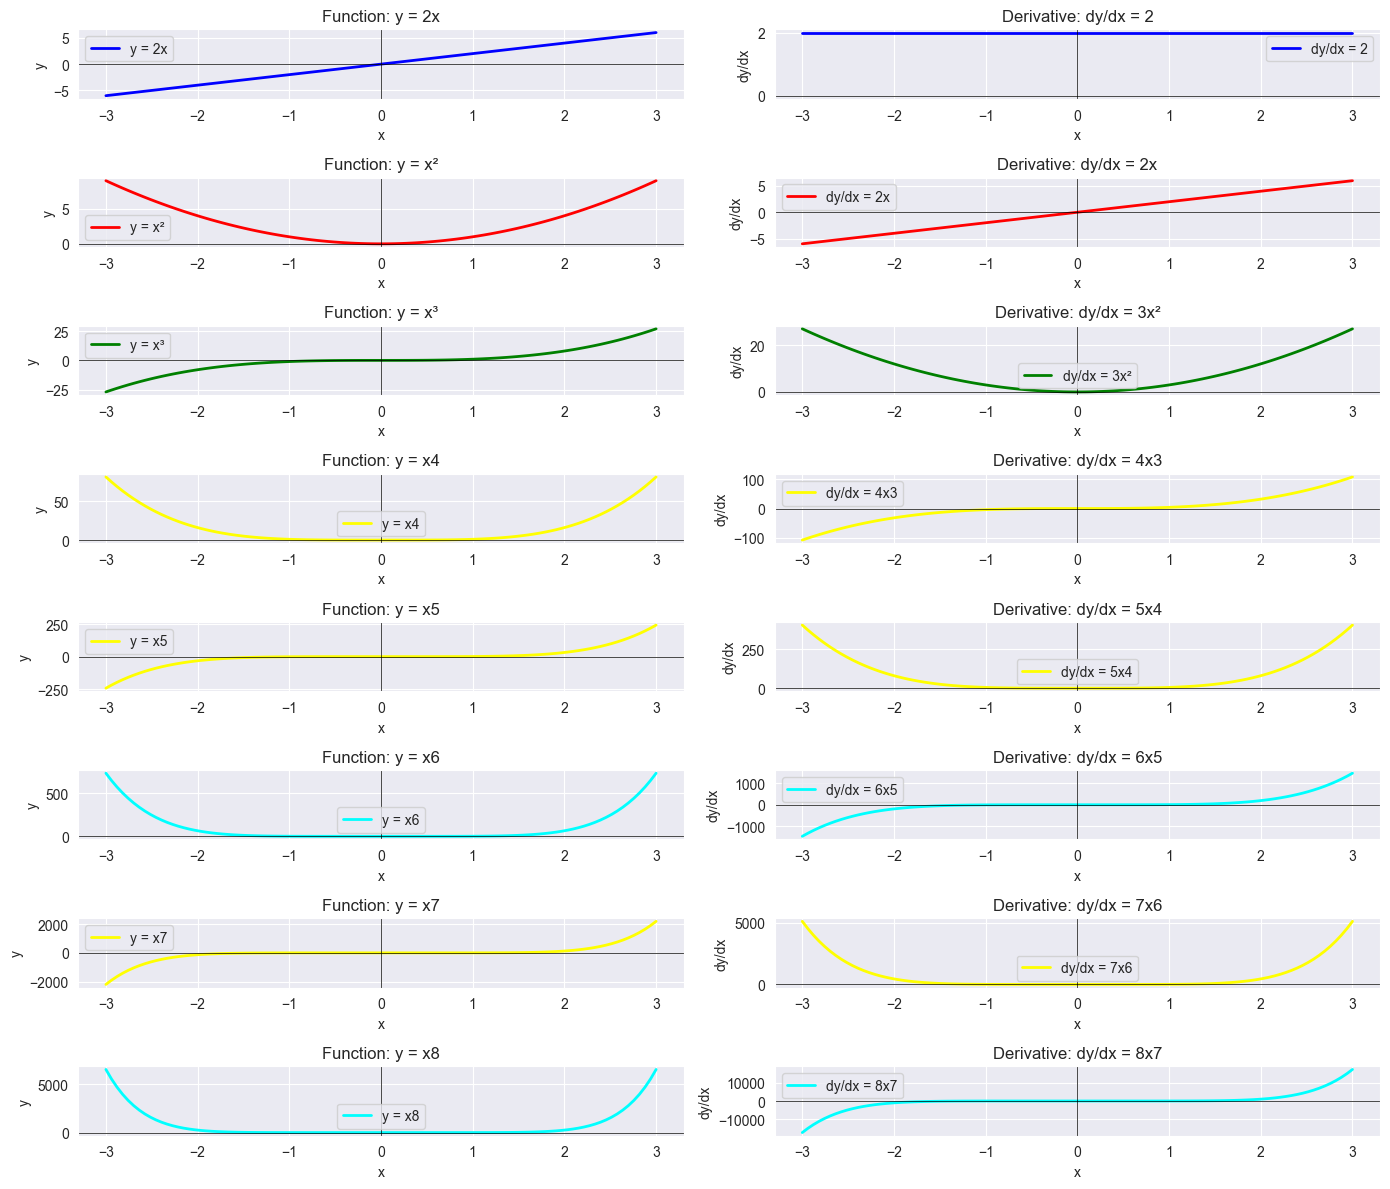

In [22]:
x = np.linspace(-3, 3, 100)

# Define functions and their derivatives
functions = [
    (lambda x: 2*x, lambda x: np.full_like(x, 2), 'y = 2x', 'dy/dx = 2', 'blue'),
    (lambda x: x**2, lambda x: 2*x, 'y = x²', 'dy/dx = 2x', 'red'),
    (lambda x: x**3, lambda x: 3*x**2, 'y = x³', 'dy/dx = 3x²', 'green'),
    (lambda x: x**4, lambda x: 4*x**3, 'y = x4', 'dy/dx = 4x3', 'yellow'),
    (lambda x: x**5, lambda x: 5*x**4, 'y = x5', 'dy/dx = 5x4', 'yellow'),
    (lambda x: x**6, lambda x: 6*x**5, 'y = x6', 'dy/dx = 6x5', 'cyan'),
    (lambda x: x**7, lambda x: 7*x**6, 'y = x7', 'dy/dx = 7x6', 'yellow'),
    (lambda x: x**8, lambda x: 8*x**7, 'y = x8', 'dy/dx = 8x7', 'cyan'),
]

fig, axes = plt.subplots(len(functions), 2, figsize=(14, 12))

for i, (f, df, f_label, df_label, color) in enumerate(functions):
    y = f(x)
    dy_dx = df(x)
    
    # Plot function
    axes[i, 0].plot(x, y, color=color, linewidth=2, label=f_label)
    axes[i, 0].set_xlabel('x')
    axes[i, 0].set_ylabel('y')
    axes[i, 0].set_title(f'Function: {f_label}')
    axes[i, 0].grid(True)
    axes[i, 0].legend()
    axes[i, 0].axhline(y=0, color='k', linewidth=0.5)
    axes[i, 0].axvline(x=0, color='k', linewidth=0.5)
    
    # Plot derivative
    axes[i, 1].plot(x, dy_dx, color=color, linewidth=2, label=df_label)
    axes[i, 1].set_xlabel('x')
    axes[i, 1].set_ylabel('dy/dx')
    axes[i, 1].set_title(f'Derivative: {df_label}')
    axes[i, 1].grid(True)
    axes[i, 1].legend()
    axes[i, 1].axhline(y=0, color='k', linewidth=0.5)
    axes[i, 1].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


## 8. Key Takeaways

**What derivatives tell us:**
- The slope (steepness) of a function at any point
- How fast the function is changing
- Whether the function is increasing or decreasing

**Simple rules:**
- Constant: y = 5 → dy/dx = 0
- Power: y = xⁿ → dy/dx = nxⁿ⁻¹
- Constant times function: y = k·f(x) → dy/dx = k·f'(x)
- Sum: y = f(x) + g(x) → dy/dx = f'(x) + g'(x)

**Remember:** The derivative is like asking "what's the slope right here?"
